### 1. Import Libraries and Dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### 2. Load Dataset

In [24]:
df = pd.read_csv(r"C:\Users\Pooja\Desktop\Elevate lab internship\Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Data Preprocessing :

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Optional: Drop non-numeric or irrelevant columns

In [26]:
data = df.drop(columns=["CustomerID", "Gender"])

### 3. Feature Scaling

In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 4. Elbow Method to Determine Optimal K

In [28]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

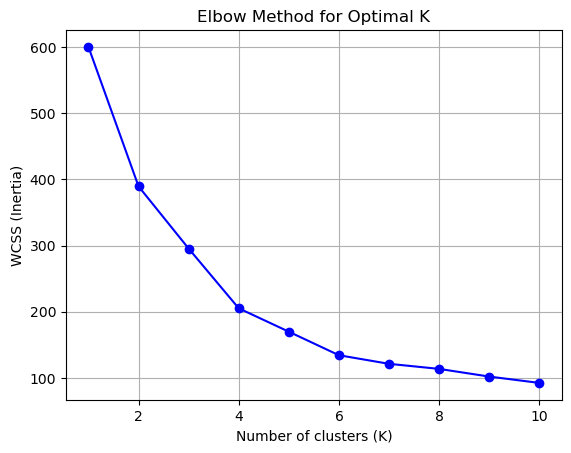

In [29]:
# Plot Elbow Curve
plt.plot(K_range, wcss, 'bo-')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

### 5. Fit KMeans with Optimal K (assume K=5 from elbow)

In [30]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_data)

In [31]:
# Add cluster labels to original data
df['Cluster'] = labels

### 6. Optional: PCA for 2D Visualization

In [32]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

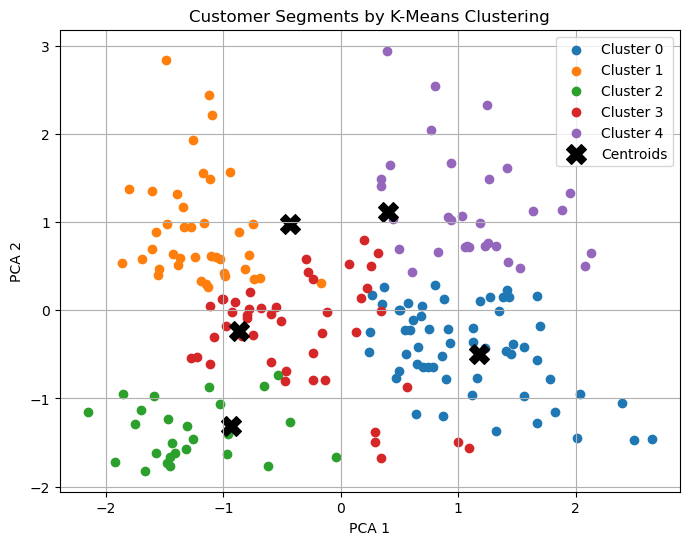

In [33]:
# Plot Clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(pca_data[labels == i, 0], pca_data[labels == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer Segments by K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()

### 7. Silhouette Score (Evaluation)

In [34]:
sil_score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=5: 0.408
